# Install


In [7]:
import pandas as pd
from datetime import datetime
import numpy as np


# Emotion Data Preprocessing Utilities


In [8]:
def convert_date(date_str):
    try:
        date_obj = datetime.strptime(str(date_str), '%a %b %d %H:%M:%S %z %Y')
        return date_obj.strftime('%Y-%m-%d %H:%M:%S')
    except (ValueError, TypeError):
        return np.nan
    
def convert_date_df(df):
    df['date'] = df['created_at'].apply(convert_date)
    df = df.dropna(subset=['date'])
    df['date'] = pd.to_datetime(df['date'])

    # Create 'year' and 'month' columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    return df


def filter_emotion(df):
    df = df[['screen_name','joy_pys','sadness_pys','anger_pys','surprise_pys','disgust_pys','fear_pys','date']]
    df['date'] = pd.to_datetime(df['date'])
    return df

def filter_emotion_all(df):
    df = df[['screen_name','joy','sadness','anger','surprise','disgust','fear','date']]
    df['date'] = pd.to_datetime(df['date'])
    return df
def avg_emotion_per_user(df):
    df.loc[:, 'date'] = pd.to_datetime(df['date'])

    df.set_index('date', inplace=True)
    # Resample DataFrame to weekly frequency and calculate mean for each user
    weekly_avg_per_user = df.groupby('screen_name').resample('M').mean()#w
    # print(weekly_avg_per_user)

    # Calculate the overall weekly average by taking the mean of the weekly averages per user
    # overall_weekly_avg = weekly_avg_per_user.mean(level='date')
    overall_weekly_avg = weekly_avg_per_user.groupby(level='date').mean()

    return overall_weekly_avg


def replace_column_emotion(df):
    df.columns = df.columns.str.replace('_pys', '', regex=False)
    return df


# --- Load and Process HCP Data ---

In [9]:
HPS = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/new/job1_tweets_emotion_pysentimento.csv')
HPS = convert_date_df(HPS)
HPS = filter_emotion(HPS)
HPS = replace_column_emotion(HPS)

unique_screen_names = pd.read_csv('../active_h_90.csv')['screen_name'].tolist()
final_h = HPS[HPS['screen_name'].isin(unique_screen_names)]


file_paths = ['job3_tweets_emotion_pysentimento.csv',
              'job2_tweets_emotion_pysentimento.csv',
              'job13_tweets_emotion_pysentimento.csv',
              'job4_tweets_emotion_pysentimento.csv',
              'job1_tweets_emotion_pysentimento.csv',
              'job12_tweets_emotion_pysentimento.csv',
              'job10_tweets_emotion_pysentimento.csv',
              'job11_tweets_emotion_pysentimento.csv',
              'job7_tweets_emotion_pysentimento.csv',
              'job5_tweets_emotion_pysentimento.csv',
              'job8_tweets_emotion_pysentimento.csv',
              'job6_tweets_emotion_pysentimento.csv',
              'job9_tweets_emotion_pysentimento.csv',
             'job18_tweets_emotion_pysentimento.csv']
OUTPUT_FILE_PATH = '/home/noaai/HCP_State_of_Mind_covid_19/new_code_for_artical/general_new/'
# Read each file into a DataFrame and store it in a list
dfs = [pd.read_csv(OUTPUT_FILE_PATH+file_path) for file_path in file_paths]

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)


general = convert_date_df(combined_df)
general = filter_emotion(general)
general = replace_column_emotion(general)


final_df = general

/tmp/ipykernel_132346/103873450.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  HPS = pd.read_csv('///home/noaai/HCP_State_of_Mind_covid_19/pysentimento_tweets_transformer_and_optim/new/job1_tweets_emotion_pysentimento.csv')
/tmp/ipykernel_132346/2725092837.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_132346/2725092837.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df

In [11]:
final_df = general
final_h.loc[:, 'date'] = pd.to_datetime(final_h['date'])
final_h.set_index('date', inplace=True)

final_df.loc[:, 'date'] = pd.to_datetime(final_df['date'])
final_df.set_index('date', inplace=True)

hcp_avg_user = final_h.reset_index()
general_avg_user = final_df.reset_index()

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import t

# # Define the periods according to the dates
before_phase_start = '2019-01-01'  # Assuming a start date for the "before" period
before_phase_end = '2020-02-29'
phase_1_start = '2020-03-01'
phase_1_end = '2020-10-31'
phase_2_start = '2020-11-01'
phase_2_end = '2021-04-30'
phase_3_start = '2021-05-01'
phase_3_end = '2021-12-31'
phase_4_start = '2022-01-01'
phase_4_end = '2022-05-31'


# Function to categorize each date into a phase
def categorize_phase(date):
    if before_phase_start <= date <= before_phase_end:
        return 'Before COVID Phases'
    elif phase_1_start <= date <= phase_1_end:
        return 'Phase 1'
    elif phase_2_start <= date <= phase_2_end:
        return 'Phase 2'
    elif phase_3_start <= date <= phase_3_end:
        return 'Phase 3'
    elif phase_4_start <= date <= phase_4_end:
        return 'Phase 4'
    else:
        return 'Outside COVID Phases'

# Apply the categorize function to add a 'phase' column
hcp_avg_user['phase'] = hcp_avg_user['date'].astype(str).apply(categorize_phase)
general_avg_user['phase'] = general_avg_user['date'].astype(str).apply(categorize_phase)


In [ ]:
hcp_avg_by_phase = hcp_avg_user.groupby(['screen_name', 'phase']).mean()
general_avg_by_phase = general_avg_user.groupby(['screen_name', 'phase']).mean()

hcp_avg_by_phase = hcp_avg_by_phase.reset_index()
general_avg_by_phase = general_avg_by_phase.reset_index()


In [ ]:
hcp_phase_data = hcp_avg_by_phase[hcp_avg_by_phase['phase'] != 'Outside COVID Phases']# !1!!!!!!!!!!!!!!!!!!!!!!!
general_phase_data = general_avg_by_phase[general_avg_by_phase['phase'] != 'Outside COVID Phases']



In [16]:
import pandas as pd
import numpy as np
from scipy.stats import t


# Function to calculate the 95% confidence interval lower and upper bounds
def calculate_95ci(series):
    n = series.count()
    if n > 1:
        mean = series.mean()
        se = series.std() / np.sqrt(n)
        ci95 = t.ppf(0.975, df=n-1) * se
        lower_bound = mean - ci95
        upper_bound = mean + ci95
        return lower_bound, upper_bound
    else:
        return np.nan, np.nan  # If there's not enough data to calculate a CI

# Compute statistics for each phase for HCP populations
hcp_stats = hcp_phase_data.groupby('phase').agg({
    'screen_name': 'nunique',  # Unique count of users
    'joy': ['mean', 'std', calculate_95ci],
    'sadness': ['mean', 'std', calculate_95ci],
    'anger': ['mean', 'std', calculate_95ci],
    'surprise': ['mean', 'std', calculate_95ci],
    'disgust': ['mean', 'std', calculate_95ci],
    'fear': ['mean', 'std', calculate_95ci]
}).reset_index()

# Compute statistics for each phase for General populations
general_stats = general_phase_data.groupby('phase').agg({
    'screen_name': 'nunique',  # Unique count of users
    'joy': ['mean', 'std', calculate_95ci],
    'sadness': ['mean', 'std', calculate_95ci],
    'anger': ['mean', 'std', calculate_95ci],
    'surprise': ['mean', 'std', calculate_95ci],
    'disgust': ['mean', 'std', calculate_95ci],
    'fear': ['mean', 'std', calculate_95ci]
}).reset_index()

# Rename columns for clarity
hcp_stats.columns = ['phase', 'unique_users', 
                     'joy_mean', 'joy_std', 'joy_95ci',
                     'sadness_mean', 'sadness_std', 'sadness_95ci',
                     'anger_mean', 'anger_std', 'anger_95ci',
                     'surprise_mean', 'surprise_std', 'surprise_95ci',
                     'disgust_mean', 'disgust_std', 'disgust_95ci',
                     'fear_mean', 'fear_std', 'fear_95ci']

general_stats.columns = ['phase', 'unique_users', 
                         'joy_mean', 'joy_std', 'joy_95ci',
                         'sadness_mean', 'sadness_std', 'sadness_95ci',
                         'anger_mean', 'anger_std', 'anger_95ci',
                         'surprise_mean', 'surprise_std', 'surprise_95ci',
                         'disgust_mean', 'disgust_std', 'disgust_95ci',
                         'fear_mean', 'fear_std', 'fear_95ci']



# Save Data

In [19]:
hcp_stats.to_csv('Data_2/hcp_stats_graph2.csv',encoding = 'utf-8')
general_stats.to_csv('Data_2/nonhcp_stats_graph2.csv',encoding = 'utf-8')


In [20]:
general_stats

,phase,unique_users,joy_mean,joy_std,joy_95ci,sadness_mean,sadness_std,sadness_95ci,anger_mean,anger_std,anger_95ci,surprise_mean,surprise_std,surprise_95ci,disgust_mean,disgust_std,disgust_95ci,fear_mean,fear_std,fear_95ci
0,Before COVID Phases,1375,0.230310,0.154902,"(0.2221153883040869, 0.23850489009058684)",0.026983,0.021442,"(0.025848814737183014, 0.028117470336695212)",0.020924,0.030138,"(0.019329609269069868, 0.022518398227211966)",0.020639,0.013660,"(0.01991613349690847, 0.021361469444869205)",0.096032,0.093504,"(0.0910850421835367, 0.10097835964793105)",0.014337,0.016717,"(0.013453055273425135, 0.015221769918278432)"
1,Phase 1,1375,0.196345,0.139932,"(0.1889422036322428, 0.20374783784331585)",0.030996,0.023675,"(0.029743175403388205, 0.032248115573808994)",0.024014,0.033874,"(0.022222245440476733, 0.02580625919406726)",0.018885,0.013800,"(0.018155329152495358, 0.019615491499652724)",0.101568,0.092808,"(0.09665822962000718, 0.10647790164262856)",0.022353,0.023338,"(0.02111846833010252, 0.023587795267874728)"
2,Phase 2,1375,0.209201,0.152749,"(0.2011206024901322, 0.2172823091160606)",0.028349,0.025530,"(0.026998122701569857, 0.029699364313547798)",0.022408,0.032079,"(0.020710851341532402, 0.02410495204440457)",0.019334,0.016153,"(0.018479871089258474, 0.02018893909924607)",0.100007,0.094259,"(0.09502050855411946, 0.10499364141136804)",0.016246,0.020489,"(0.015162533075720554, 0.017330347109279255)"
3,Phase 3,1375,0.217743,0.157233,"(0.20942461294545622, 0.22606077325685553)",0.029233,0.027391,"(0.027783704941685767, 0.030681780014024235)",0.018461,0.028131,"(0.016972996878934738, 0.01994946684811263)",0.018716,0.016344,"(0.017851191242832222, 0.01958045847807232)",0.087992,0.086131,"(0.08343505611190707, 0.0925481949656253)",0.016193,0.023187,"(0.01496657981881288, 0.01741988748326615)"
4,Phase 4,1370,0.217866,0.169705,"(0.20887216500782, 0.22686071466242094)",0.028569,0.031098,"(0.026920851426936194, 0.030217186323516176)",0.018753,0.032223,"(0.01704541704908874, 0.020460999089604553)",0.018401,0.019246,"(0.017381369677847532, 0.019421477101387582)",0.093402,0.097879,"(0.08821407671246187, 0.09858916055778988)",0.013915,0.025519,"(0.012562479224734052, 0.01526749553429179)"


# Load Data

In [ ]:
hcp_stats = pd.read_csv('Data_2/hcp_stats_graph2.csv')
general_stats = pd.read_csv('Data_2/nonhcp_stats_graph2.csv')


In [ ]:
 Formatting output to match the style of the image
def format_output(stats_df, group_name):
    for index, row in stats_df.iterrows():
        print(f"The top 5 themes for {group_name} in {row['phase']} were:")
        print(f"- Joy: 95% CI [{row['joy_95ci'][0]:.3f}, {row['joy_95ci'][1]:.3f}]")
        print(f"- Sadness: 95% CI [{row['sadness_95ci'][0]:.3f}, {row['sadness_95ci'][1]:.3f}]")
        print(f"- Anger: 95% CI [{row['anger_95ci'][0]:.3f}, {row['anger_95ci'][1]:.2f}]")
        print(f"- Surprise: 95% CI [{row['surprise_95ci'][0]:.3f}, {row['surprise_95ci'][1]:.3f}]")
        print(f"- Disgust: 95% CI [{row['disgust_95ci'][0]:.3f}, {row['disgust_95ci'][1]:.3f}]")
        print(f"- Fear: 95% CI [{row['fear_95ci'][0]:.3f}, {row['fear_95ci'][1]:.3f}]\n")

# Output the formatted statistics
format_output(hcp_stats, 'HCP Population')
format_output(general_stats, 'General Population')


In [34]:
df=  pd.concat([
    hcp_stats.assign(group='HCP Population'),
    general_stats.assign(group='General Population')
], ignore_index=True)

In [35]:
colors = {'HCP Population': 'blue',  'General Population': 'green'}
colors['General Population']

'green'

In [36]:
colors = {'HCP Population': 'blue',  'General Population': 'green'}
colors['General Population']


df['group'] = df['group'].replace('HCP Population', 'HWFs')
df['group'] = df['group'].replace('General Population', 'Non-HWFs')
df['phase'] = df['phase'].replace('Before COVID Phases', 'Before COVID')

Phases present in the data: ['Before COVID', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
Categories (5, object): ['Before COVID' < 'Phase 1' < 'Phase 2' < 'Phase 3' < 'Phase 4']


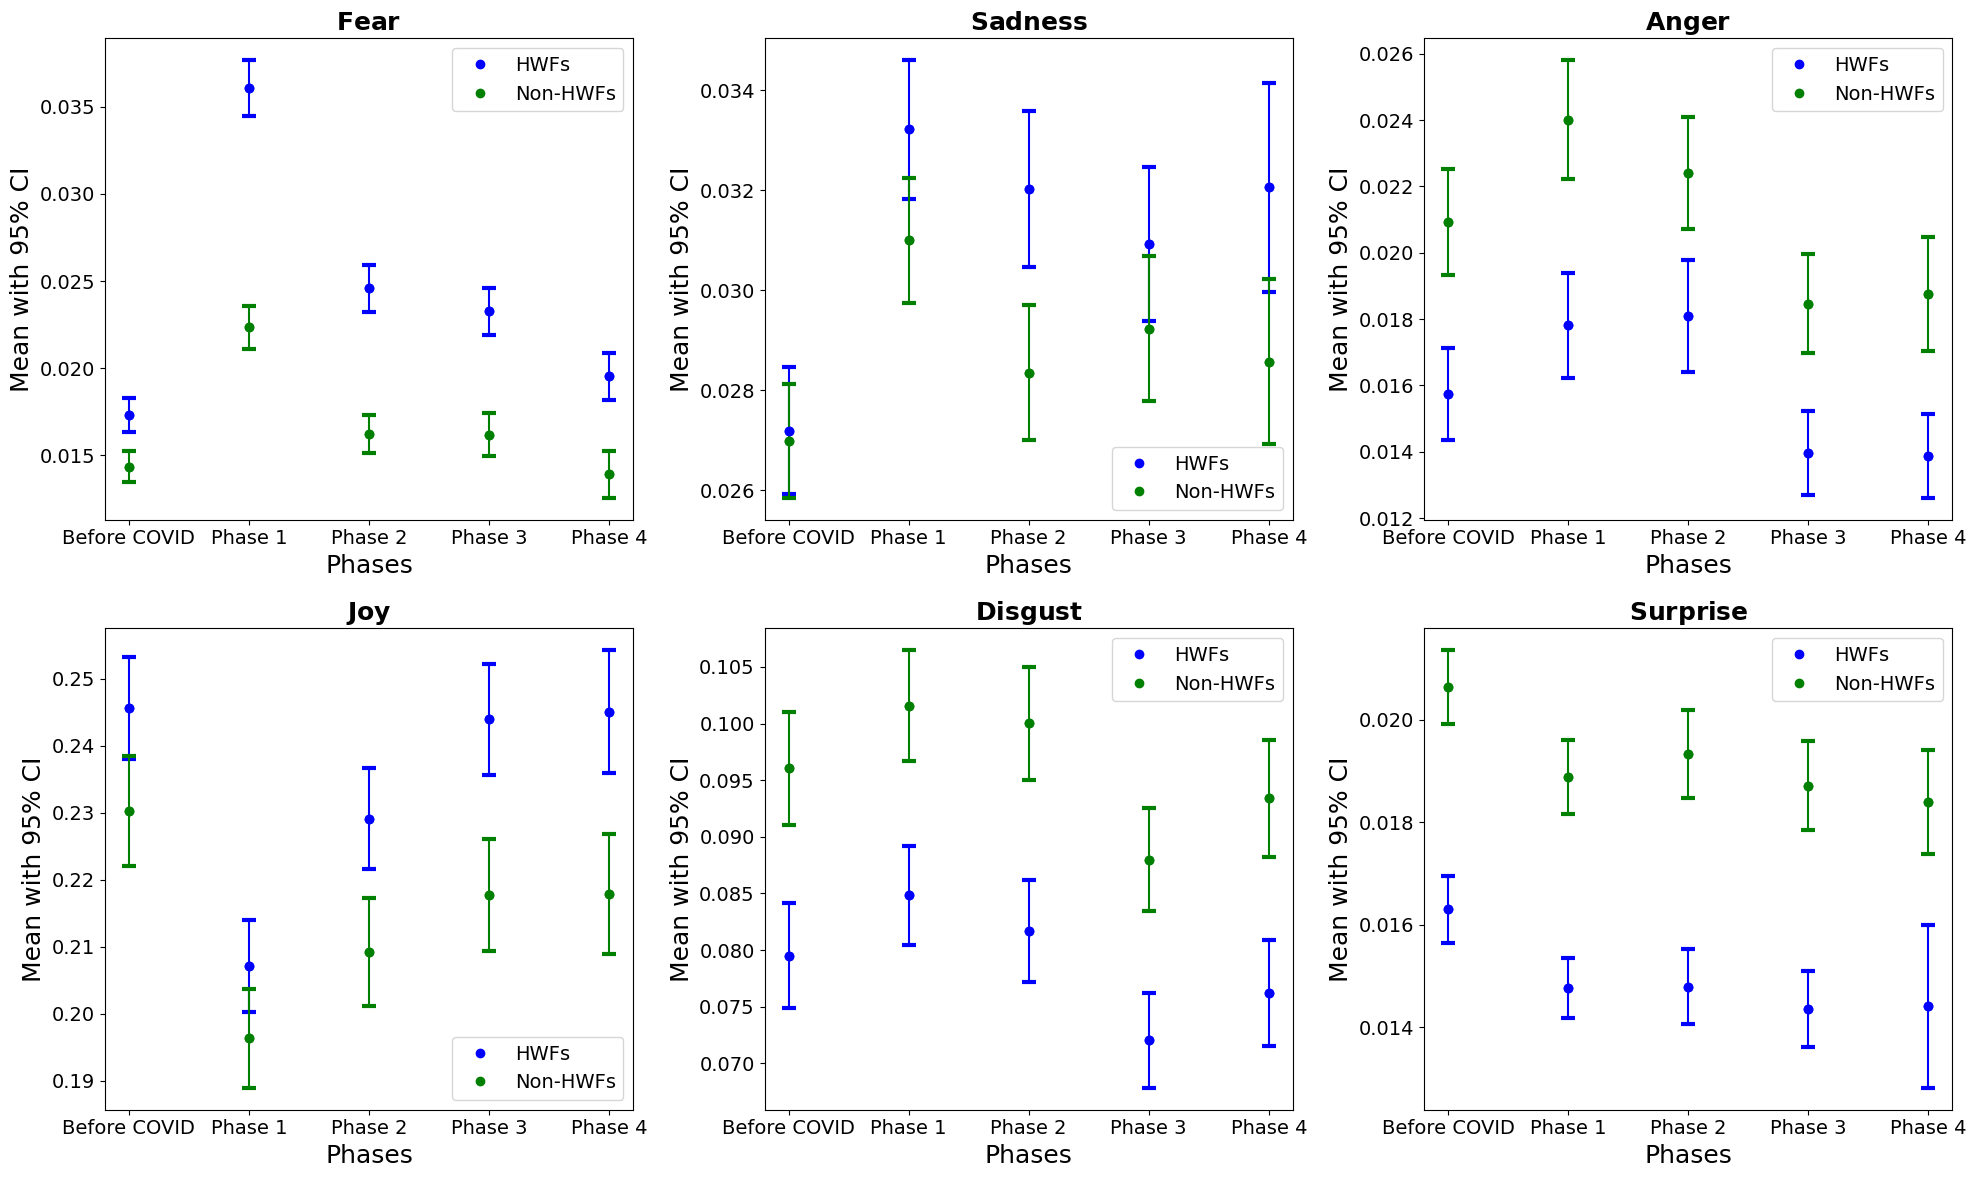

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Define colors for consistency, including 'General Population' if needed
colors = {'HWFs': 'blue', 'Non-HWFs': 'green'}

# Define phases and their corresponding dates (for time index if needed)
phases = ['Before COVID', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
phase_dates = ['2019-01-01', '2020-03-01', '2020-11-01', '2021-05-01', '2022-01-01']

# Convert 'phase' to an ordered categorical variable to ensure the correct order
df['phase'] = pd.Categorical(df['phase'], categories=phases, ordered=True)

# Ensure all phases are present
print("Phases present in the data:", df['phase'].unique())

# Global font size settings (for all text elements)
plt.rcParams.update({'font.size': 14})  # Set global font size for the plot

# Plotting each emotion with CI lines
plt.figure(figsize=(20, 12))  # Update the figure size to be more appropriate for 2x3 layout
# Update the subplot configuration to 2 rows and 3 columns
for i, emotion in enumerate(['fear', 'sadness', 'anger', 'joy', 'disgust', 'surprise'], 1):
    plt.subplot(2, 3, i)
    
    for group in df['group'].unique():
        group_df = df[df['group'] == group]
        mean_values = group_df[f'{emotion}_mean']
        ci_lower = group_df[f'{emotion}_95ci'].apply(lambda x: x[0])
        ci_upper = group_df[f'{emotion}_95ci'].apply(lambda x: x[1])
        
        # Use 'phase' for the x-axis
        plt.plot(group_df['phase'], mean_values, label=f'{group}', marker='o', color=colors[group], linestyle='none')
        
        # Calculate error bars using absolute values to avoid negative errors
        yerr = np.abs([mean_values - ci_lower, ci_upper - mean_values])
        
        plt.errorbar(group_df['phase'], mean_values, 
                     yerr=yerr, 
                     fmt='o', capsize=5, capthick=3, linestyle='none', linewidth=1.5, color=colors[group])
    
    # Set font sizes for titles and labels
    plt.title(r'$\bf{' + emotion.capitalize() + '}$', fontsize=18)  # Title font size
    plt.xlabel('Phases', fontsize=18)  # X-axis label font size
    plt.ylabel(f'Mean with 95% CI', fontsize=18)  # Y-axis label font size
    plt.legend(loc='best', fontsize=14)
  # Legend font size
    plt.grid(False)
    plt.xticks(rotation=0, fontsize=14)  # X-tick label font size (phases)
    plt.yticks(fontsize=14)  # Y-tick label font size

# Adjust spacing between subplots to avoid overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.5)

# Final layout adjustments
plt.tight_layout()
plt.savefig('graph/fig2_HWFs.png', dpi=300, bbox_inches='tight')

plt.show()


Phases present in the data: ['Before COVID', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
Categories (5, object): ['Before COVID' < 'Phase 1' < 'Phase 2' < 'Phase 3' < 'Phase 4']


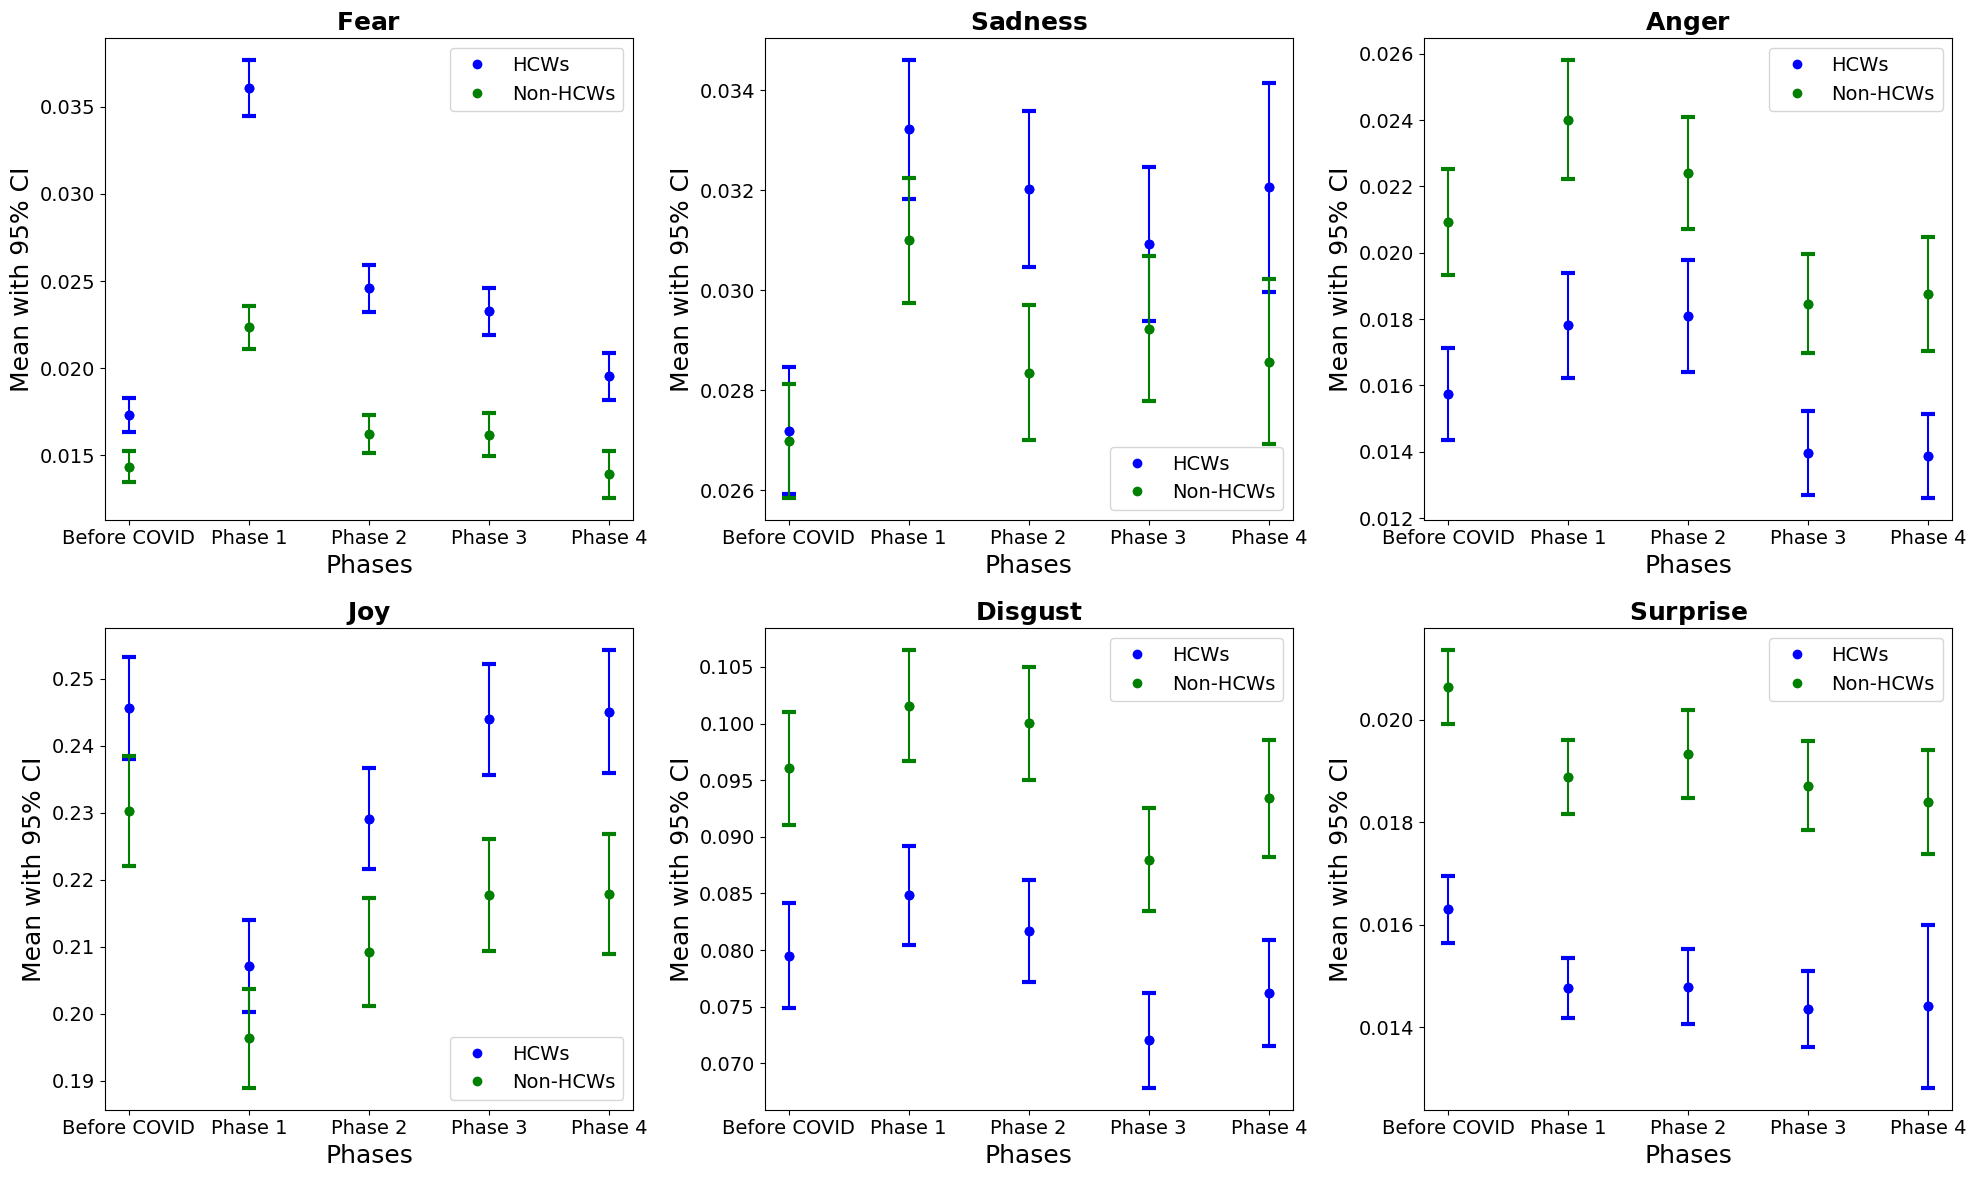

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Define colors for consistency, including 'General Population' if needed
colors = {'HCWs': 'blue', 'Non-HCWs': 'green'}

# Define phases and their corresponding dates (for time index if needed)
phases = ['Before COVID', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
phase_dates = ['2019-01-01', '2020-03-01', '2020-11-01', '2021-05-01', '2022-01-01']

# Convert 'phase' to an ordered categorical variable to ensure the correct order
df['phase'] = pd.Categorical(df['phase'], categories=phases, ordered=True)

# Ensure all phases are present
print("Phases present in the data:", df['phase'].unique())

# Global font size settings (for all text elements)
plt.rcParams.update({'font.size': 14})  # Set global font size for the plot

# Plotting each emotion with CI lines
plt.figure(figsize=(20, 12))  # Update the figure size to be more appropriate for 2x3 layout
# Update the subplot configuration to 2 rows and 3 columns
for i, emotion in enumerate(['fear', 'sadness', 'anger', 'joy', 'disgust', 'surprise'], 1):
    plt.subplot(2, 3, i)
    
    for group in df['group'].unique():
        group_df = df[df['group'] == group]
        mean_values = group_df[f'{emotion}_mean']
        ci_lower = group_df[f'{emotion}_95ci'].apply(lambda x: x[0])
        ci_upper = group_df[f'{emotion}_95ci'].apply(lambda x: x[1])
        
        # Use 'phase' for the x-axis
        plt.plot(group_df['phase'], mean_values, label=f'{group}', marker='o', color=colors[group], linestyle='none')
        
        # Calculate error bars using absolute values to avoid negative errors
        yerr = np.abs([mean_values - ci_lower, ci_upper - mean_values])
        
        plt.errorbar(group_df['phase'], mean_values, 
                     yerr=yerr, 
                     fmt='o', capsize=5, capthick=3, linestyle='none', linewidth=1.5, color=colors[group])
    
    # Set font sizes for titles and labels
    plt.title(r'$\bf{' + emotion.capitalize() + '}$', fontsize=18)  # Title font size
    plt.xlabel('Phases', fontsize=18)  # X-axis label font size
    plt.ylabel(f'Mean with 95% CI', fontsize=18)  # Y-axis label font size
    plt.legend(loc='best', fontsize=14)
  # Legend font size
    plt.grid(False)
    plt.xticks(rotation=0, fontsize=14)  # X-tick label font size (phases)
    plt.yticks(fontsize=14)  # Y-tick label font size

# Adjust spacing between subplots to avoid overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.5)

# Final layout adjustments
plt.tight_layout()
plt.show()


Phases present in the data: ['Before COVID', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
Categories (5, object): ['Before COVID' < 'Phase 1' < 'Phase 2' < 'Phase 3' < 'Phase 4']


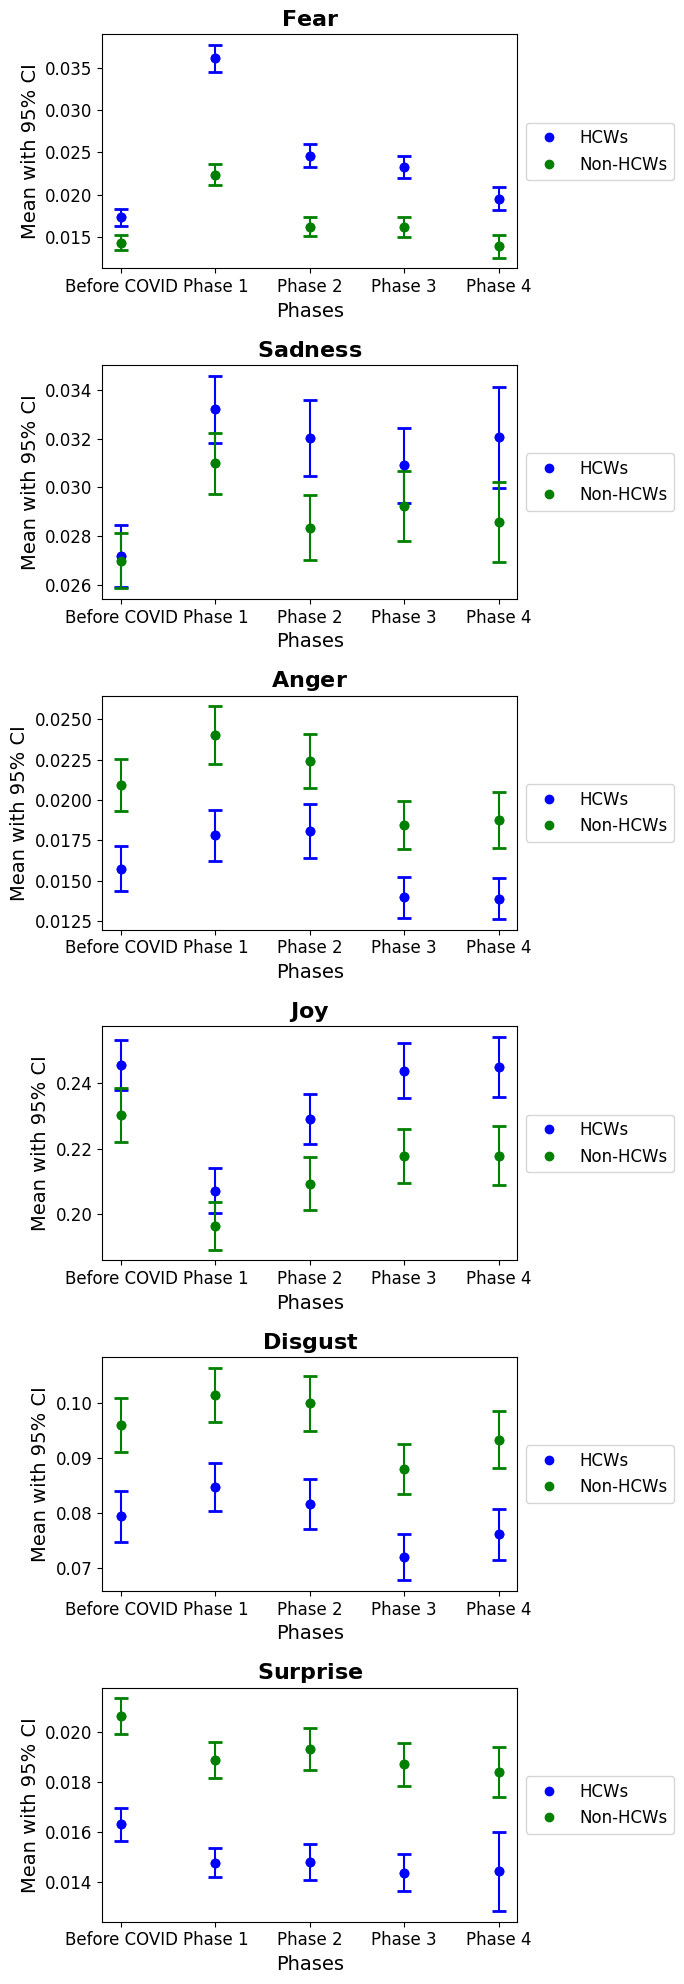

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Define colors for consistency, including 'General Population' if needed
colors = {'HCWs': 'blue', 'Non-HCWs': 'green'}

# Define phases and their corresponding dates (for time index if needed)
phases = ['Before COVID', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4']
phase_dates = ['2019-01-01', '2020-03-01', '2020-11-01', '2021-05-01', '2022-01-01']

# Convert 'phase' to an ordered categorical variable to ensure the correct order
df['phase'] = pd.Categorical(df['phase'], categories=phases, ordered=True)

# Ensure all phases are present
print("Phases present in the data:", df['phase'].unique())

# Global font size settings (for all text elements)
plt.rcParams.update({'font.size': 12})  # Set global font size for the plot

# Define the emotions and colors
emotions = ['fear', 'sadness', 'anger', 'joy', 'disgust', 'surprise']

# Create subplots, with one row per emotion and set figsize here
fig, axs = plt.subplots(len(emotions), 1, figsize=(7, 20))

# Plotting each emotion with CI lines
for j, emotion in enumerate(emotions):
    
    for group in df['group'].unique():
        group_df = df[df['group'] == group]
        mean_values = group_df[f'{emotion}_mean']
        ci_lower = group_df[f'{emotion}_95ci'].apply(lambda x: x[0])
        ci_upper = group_df[f'{emotion}_95ci'].apply(lambda x: x[1])
        
        # Use 'phase' for the x-axis
        axs[j].plot(group_df['phase'], mean_values, label=f'{group}', marker='o', color=colors[group], linestyle='none')
        
        # Calculate error bars using absolute values to avoid negative errors
        yerr = np.abs([mean_values - ci_lower, ci_upper - mean_values])
        
        axs[j].errorbar(group_df['phase'], mean_values, 
                        yerr=yerr, 
                        fmt='o', capsize=5, capthick=2, linestyle='none', linewidth=1.5, color=colors[group])
    
    # Set font sizes for titles and labels
    axs[j].set_title(r'$\bf{' + emotion.capitalize() + '}$', fontsize=16)  # Title font size
    axs[j].set_xlabel('Phases', fontsize=14)  # X-axis label font size
    axs[j].set_ylabel(f'Mean with 95% CI', fontsize=14)  # Y-axis label font size
    axs[j].tick_params(axis='x', rotation=0, labelsize=12)  # X-tick label font size (phases)
    axs[j].tick_params(axis='y', labelsize=12)  # Y-tick label font size

    # Place legend outside of the plot
    axs[j].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Adjust spacing between subplots to avoid overlap
plt.subplots_adjust(left=0.1, right=0.85, top=0.95, bottom=0.05, hspace=0.5)

# Final layout adjustments
plt.tight_layout()
plt.show()
